<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Statistics_Basics_Finding_F_and_P_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In [20]:
# Main question: we have results from 4 tests (A, B, C, D) (see data link below)
# Are these results statistically significant?
# Our H-zero (Zero hypothesis) is that the results between groups are not statistically significant
# For H-zero to be true F has to be very small, close to 0 and P > 0.005
# For the results to be statistically significant F has to be not too small, definetly not close to 0 and P < 0.005

# Process followed:

# 1. Import libraries
# 2. Import and read dataset
# 3. Clean dataset
# 4. Do EDA (exploratory data analysis) to see the data
# 5. Find F and P
# 6. Conclusion

In [21]:
# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats

In [22]:
# 2. Import and read dataset

url = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'

df = pd.read_csv(url, header=None, sep=',')

# Import and Read Dataset

Import and Read Dataset

In [23]:
df

,0,1
0,expr,Therapy
1,100,A
2,96,A
3,101,A
4,95,A
...,...,...
56,87,D
57,93,D
58,96,D
59,92,D


In [24]:
df.columns

Int64Index([0, 1], dtype='int64')

# Clean Dataset

In [25]:
# 3. Clean dataset

# We need to clean the data: drop the first row and move column labels to header

# We set the column labels to equal the values in the 1st row (index location 0):

df.columns  = df.iloc[0]

df

,expr,Therapy
0,expr,Therapy
1,100,A
2,96,A
3,101,A
4,95,A
...,...,...
56,87,D
57,93,D
58,96,D
59,92,D


In [54]:
# Then we drop the 1st row using iloc
# We will save the new dataset as df_cleaned and will use this dataset from the rest of the operations

df_cleaned=df.iloc[pd.RangeIndex(len(df)).drop(0)]
df_cleaned

,expr,Therapy
1,100.0,A
2,96.0,A
3,101.0,A
4,95.0,A
5,103.0,A
6,99.0,A
7,97.0,A
8,96.0,A
9,98.0,A
10,106.0,A


In [55]:
df_cleaned.columns

Index(['expr', 'Therapy'], dtype='object', name=0)

In [56]:
df_cleaned.head

<bound method NDFrame.head of 0    expr Therapy
1   100.0       A
2    96.0       A
3   101.0       A
4    95.0       A
5   103.0       A
6    99.0       A
7    97.0       A
8    96.0       A
9    98.0       A
10  106.0       A
11  106.0       A
12  104.0       A
13   95.0       A
14   95.0       A
15  105.0       A
16  100.0       B
17  100.0       B
18   95.0       B
19   84.0       B
20  101.0       B
21  101.0       B
22   95.0       B
23  106.0       B
24  105.0       B
25   97.0       B
26  103.0       B
27   94.0       B
28   94.0       B
29  100.0       B
30  107.0       B
31   91.0       C
32   96.0       C
33   94.0       C
34   96.0       C
35   91.0       C
36   85.0       C
37   98.0       C
38   93.0       C
39  100.0       C
40   85.0       C
41  101.0       C
42  101.0       C
43   90.0       C
44   98.0       C
45   97.0       C
46   92.0       D
47   85.0       D
48   95.0       D
49   89.0       D
50   91.0       D
51   91.0       D
52   99.0       D
53   94.0       

In [57]:
df_cleaned.shape

(60, 2)

In [59]:
# We convert the 'expr' column to numeric:

df_cleaned.expr = pd.to_numeric(df_cleaned['expr'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# EDA (exploratory data anaylis)

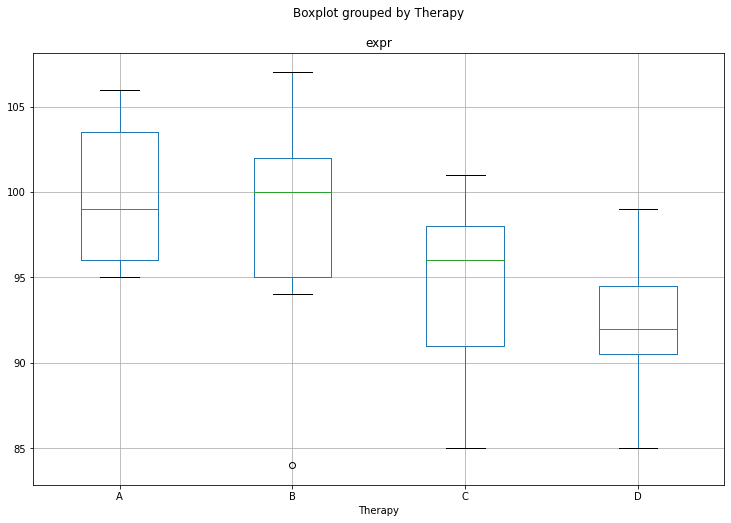

In [60]:
# 4. Do EDA (exploratory data analysis) to see the data

# Let's explore data looking at boxplot

df_cleaned.boxplot('expr', by='Therapy', figsize=(12,8), grid=True)

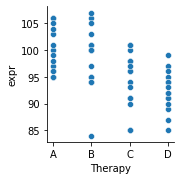

In [61]:
# another view is via pairplot

import seaborn as sns

sns.pairplot(df_cleaned, y_vars="expr", x_vars=["Therapy"])

# Find F and P

In [62]:
# 5. Find F and P

# Having P < 0.005 and F a bit over 8, tells us that there is statistical significance between these groups
# H-zero is not supported by these values of P and F

A = df_cleaned[df_cleaned["Therapy"] == "A"]["expr"]
B = df_cleaned[df_cleaned["Therapy"] == "B"]["expr"]
C = df_cleaned[df_cleaned["Therapy"] == "C"]["expr"]
D = df_cleaned[df_cleaned["Therapy"] == "D"]["expr"]
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [66]:
# We can also get F and P values, plus the sum_sq, mean_sq and df using anova
# source https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html

# import these libraires
import statsmodels.api as sm
from statsmodels.formula.api import ols

expr_lm = ols('expr ~ Therapy',data=df_cleaned).fit()
table = sm.stats.anova_lm(expr_lm, type=2) # Type 2 Anova DataFrame
print(table)

# sum_sq for Thearpy is SSB (=total sum of squares between groups)
# mean_sq for Therapy is SSB/df
# df for Therapy is degrees of freedom between groups 
# sum_sq for Residual is SSW (=total sum of squares within groups)
# mean_sq for Residual is SSW/df
# df for Residual is degrees of freedom within groups

            df       sum_sq     mean_sq         F    PR(>F)
Therapy    3.0   560.716667  186.905556  8.037302  0.000152
Residual  56.0  1302.266667   23.254762       NaN       NaN


In [39]:
# 6. Conclusion

# If H-zero is TRUE then F has to be very small, close to 0 and P > 0.005
# In our case F is 8.037 and P < 0.005
# This allows us to say that H-zero is not True and there is statistical significance between these 4 groups